In [1]:
import samplemaker.layout as smlay
import samplemaker.makers as sm
from samplemaker.viewers import GeomView
from samplemaker.plotly_viewers import GeomViewPlotly




In [2]:
mask = smlay.Mask("00_test_mask")

re0 = sm.make_rect(x0 = 0, y0 = 0, width = 2, height = 2, layer = 1)
re0+= re0.copy().translate(20,0)
GeomViewPlotly(re0)


In [3]:
geomE = sm.make_rect(0, 2, 6, 3, numkey=3, layer = 2)
geomE += sm.make_circle(10, 0, 3)
geomE += sm.make_circle(20, 0, 3, layer=1, to_poly=True, vertices=10)

geomE+=(sm.make_poly([30,40,35,31], [0,-2,8,7]))
geomE += sm.make_path([50,50,60],[0 ,10,10],1,to_poly=True)

geomE += sm.make_text(70, 0 , "Hello", 10, 1, numkey = 1, to_poly = True,)

geomE += sm.make_rounded_rect(0, 20, 20, 20, 5, resolution = 2)
GeomViewPlotly(geomE)

In [4]:
import samplemaker.layout as smlay
import samplemaker.makers as sm
from samplemaker.viewers import GeomView


mask = smlay.Mask("00_test_mask")

base = sm.make_rect(0, 0, 2, 10, layer = 1)
base += sm.make_circle(4,5,1, to_poly = True)
mask.addCell("BCELL", base)


geomB = sm.make_sref(20, 15, "BCELL", base, mag=1.0, angle =0, mirror=False)
geomB += sm.make_sref(40, 15, "BCELL", base, mag=1.5, angle =45, mirror=False)
geomC = geomB.flatten()
b2 = sm.make_rounded_rect(0,0,7,3,1)
b2+= sm.make_sref(40,15, "BCELL", base)
GeomViewPlotly(geomC)

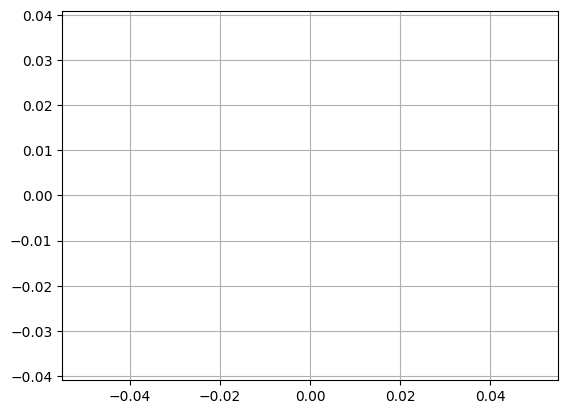

In [27]:
# Create a simple mask layout
themask = smlay.Mask("02_Tutorial_CellReferences")

# Let's draw a simple shape
base = sm.make_rect(0,0,2,10)
base += sm.make_circle(4,5,1,to_poly=True)

# We would like to make identical copies of this.
# Instead of using base.copy() which duplicates the memory and GDS file size
# we can place base in a GDS CELL and refer to it in our main cell

# Create a new GDS cell called "BCELL"
themask.addCell("BCELL", base)

# Now create a single reference to it 
geomE = sm.make_sref(20, 15, "BCELL", base,mag=1.0,angle=0,mirror=False)
# Note that we can move, rotate, scale and mirror the reference 

# Let's create another instance but scaledby 50%  and rotated by 45 degrees
geomE += sm.make_sref(40, 15, "BCELL", base,mag=1.5,angle=45,mirror=False)

GeomView(geomE)

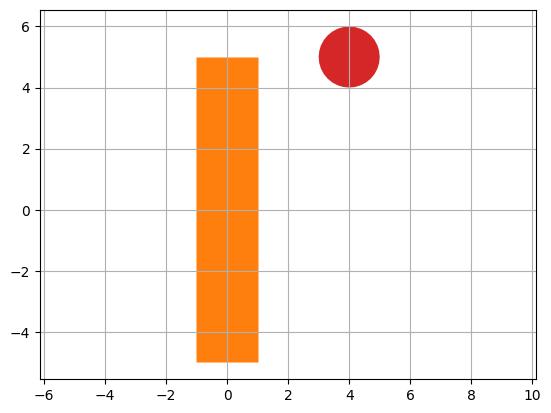

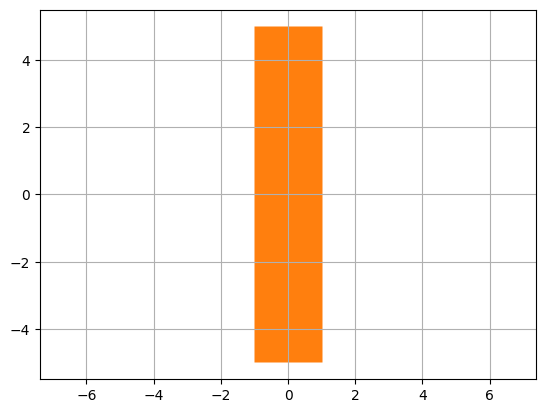

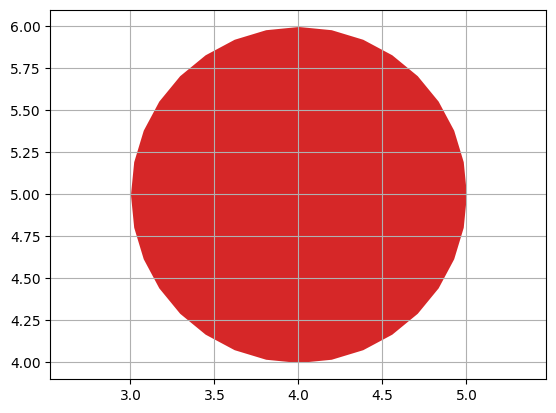

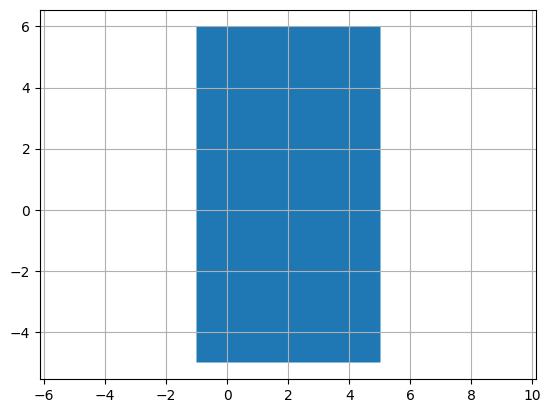

In [38]:
mask =  smlay.Mask("03_test_mask")

base = sm.make_rect(0,0,2,10)
base += sm.make_circle(4,5,1,to_poly=True, layer= 3)
GeomView(base)
geomE = sm.GeomGroup()

gsel1 = base.select_layer(1)
gsel2 = base.deselect_layers([1])
GeomView(gsel1)
GeomView(gsel2)

bb = base.bounding_box()
rbox = bb.toRect()
GeomView(rbox)

geomE += base

res1 = base.copy()
res1.set_layer(2)
res1

## Tutorial 3

In [4]:
# Let's import basic stuff
import samplemaker.layout as smlay # used for layout 
import samplemaker.makers as sm # used for drawing
from samplemaker.plotly_viewers import GeomViewPlotly # used for
from samplemaker.viewers import GeomView # used for viewing
# Create a simple mask layout
themask = smlay.Mask("03_Tutorial_GroupManipulation")

# Let's start again from a simple shape
base = sm.make_rect(0,0,2,10)
base += sm.make_circle(4,5,1,to_poly=True,layer=3)
GeomViewPlotly(base)

# You can create empty groups
geomE = sm.GeomGroup()


In [7]:
# We can translate,rotate,scale and mirror (see previous tutorials)

# Layer selection
# We can create a new group that only selects one or more layers
gsel = base.select_layer(1)
# or removes some layers
gsel2 = base.deselect_layers([1])
# Note that both require assignments, the original "base" is untouched

# It might be interesting to calculate the bounding box:
bb = base.bounding_box()
rbox=bb.toRect() # rbox contains 1 rectangle size of the bounding box

GeomViewPlotly(rbox+gsel+gsel2)


In [10]:
base.all_to_poly()
# Adding base to geomE
geomE+=base

# RESIZING operations
# You can resize polygon isotropically
res1 = base.copy() # We keep base for later
res1.set_layer(1) # put all in layer 1
# The following bloats the polygons in layer 1 by 2 um in all directions, note that elements will merge
# Use negative values to shrink
res1.poly_resize(2.0, 1)
res1.translate(20, 0)

geomE+=res1 # adding the result to the main Geometry
GeomViewPlotly(geomE)

In [12]:
# OUTLINING
# You can make the outline of a shape:
out1 = base.copy()
out1.set_layer(1)
# Creates an outline of the shape with width of 0.3 um
out1.poly_outlining(0.3, 1)
out1.translate(40, 0)
geomE+=out1
GeomViewPlotly(geomE)

In [13]:
# Let's add all to main cell
themask.addToMainCell(geomE)    

# Export to GDS
themask.exportGDS()


Opened 03_Tutorial_GroupManipulation.gds
Writing structure: CELL00
Writing to GDS complete.


#  Tutorial 4

In [32]:
"""
04_Tutorial_Boolean
"""


# In this tutorial we learn how to do boolean operations between groups of 
# polygons

# Let's import basic stuff
import samplemaker.layout as smlay # used for layout 
import samplemaker.makers as sm # used for drawing
from samplemaker.plotly_viewers import GeomViewPlotly # used for


# Create a simple mask layout
themask = smlay.Mask("04_Tutorial_Boolean")


In [33]:
# Empty geometry
geomE = sm.GeomGroup()

# Let's make a large box
box0 = sm.make_rect(0,0,100,100,layer=1)

# And some text, because text is complex polygons!
text0 = sm.make_text(0, 0, "DIFF", 10, 2,angle=30,to_poly=True,layer=1)

GeomViewPlotly(box0+text0+ geomE)

In [34]:
# Let's take the boolean difference box-text
bdiff = box0.copy() # Note that boolean operations alter the original element so we need to make a copy first
bdiff.boolean_difference(text0, 1, 1)
# The first integer is the layer from which you should subtract and the second is the subtracted layer
# Now bdiff is box-text
geomE+=bdiff
GeomViewPlotly(geomE)

In [35]:
# Now let's try intersection (AND operation)
# Let's use two overlapping texts, slighlty larger
text1 = sm.make_text(0,0,"DIFF",11,3,angle=30,to_poly=True,layer=1)
GeomViewPlotly(text1+text0.copy().set_layer(2))
text1.boolean_intersection(text0, 1, 1)
text1.translate(100, 0)
geomE+=text1
GeomViewPlotly(geomE)

In [36]:
# XOR is also quite useful, only keeps parts that are not in both
text2 = sm.make_text(50,0,"XOR",10,1,angle=0,to_poly=True,layer=1)
GeomViewPlotly(text2+box0.copy().set_layer(2))
text2.boolean_xor(box0, 1, 1)
text2.translate(200, 0)
geomE+=text2
GeomViewPlotly(geomE)

In [37]:
# Trapezoid slicing, useful for some e-beam export
trapz = text2.copy()
GeomViewPlotly(trapz)
trapz.trapezoids(1)
GeomViewPlotly(text2+trapz.copy().set_layer(2))    
trapz.translate(150, 0)
geomE+=trapz

In [38]:
# Union, we could re-unite all trapezoids in the previous
uni1 = trapz.copy()
uni1.boolean_union(1)
uni1.translate(150, 0)
geomE+=uni1
themask.addToMainCell(geomE)
themask.exportGDS()



Opened 04_Tutorial_Boolean.gds
Writing structure: CELL00
Writing to GDS complete.


In [39]:
# Just for fun, outlining the last result
out1 = uni1.copy()
out1.poly_outlining(1, 1)
out1.translate(150, 0)
geomE+=out1

# Let's add all to main cell
themask.addToMainCell(geomE)    

# Export to GDS
themask.exportGDS()

# Finished!


Opened 04_Tutorial_Boolean.gds
Writing structure: CELL00
Writing to GDS complete.


# Tutorial 5


In [40]:
# In this tutorial we look into the samplemaker device architecture.
# It allows us to create library parts that can be interconnected, iterated into tables, etc..

# Let's import basic stuff
import samplemaker.layout as smlay # used for layout 
import samplemaker.makers as sm # used for drawing
# We need the device class
from samplemaker.devices import Device
# And the device inspection tool
from samplemaker.viewers import DeviceInspect

In [41]:
# Create a simple mask layout
themask = smlay.Mask("05_Tutorial_Devices")

# Empty geometry
geomE = sm.GeomGroup()

# We will take as example a device called free-free membrane
# 10.1103/PhysRevB.98.155316
# We draw a rectangular membrane supported by tethers
# and use boolean operations to create the negative to be etched
# Instead of typing all code in the main script, we create a parametric device
# by deriving from the base class Device, which we imported earlier


In [42]:
class FreeFreeMembrane(Device):
    # We need to implement a few mandatory functions here:
    def initialize(self):
        # This function setups some variable, like the unique identifier name
        self.set_name("CUSTOM_FFM")
        # Also add a description, useful for documenting later
        self.set_description("Free free membrane as in 10.1103/PhysRevB.98.155316, etc etc")
                
    def parameters(self):
        # define all the paramters of the device and their default values.
        # You can specify what type the parameter has and what it the minimum-maximum allowed values
        # Default is float and range (0,infinity) for all parameters.
        self.addparameter("L", 40, "Length of the membrane", param_type=float, param_range=(0.5,150))
        self.addparameter("W", 12.5, "Width of the membrane")
        self.addparameter("tetW", 2, "Tether width")
        self.addparameter("tetOff", 11, "Tether offset from the center")
        self.addparameter("R", 30, "Support ring radius")
        
    def geom(self):
        # This is where we place the commands for drawing!
        # This function should return a GeomGroup
        
        # we can fetch the parameters first to shorten the notation
        # note that you can choose whetner a type cast should be made (i.e. forcing the parameter to be
        # of the type specified in the addparameter command) and if it should be clipped in the allowed range. 
        p = self.get_params(cast_types=True,clip_in_range=True)
        # Draw the membrane
        mem = sm.make_rect(0,0,p["W"],p["L"])
        # Draw tether
        tet = sm.make_rect(0,p["tetOff"],p["R"]*2,p["tetW"])
        # Mirror to get the second one
        tet2 = tet.copy()
        tet2.mirrorY(0)
        mem+=tet+tet2
        # Support ring
        ring = sm.make_circle(0, 0, p["R"],to_poly=True,vertices=64)
        # boolean
        ring.boolean_difference(mem, 1, 1)
        return ring

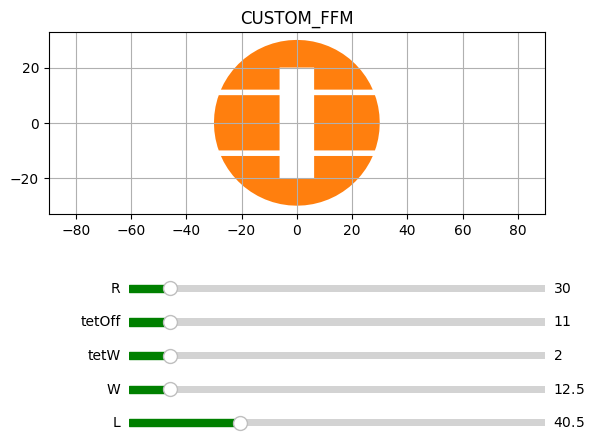

In [43]:
# That's all, we now have a device that we can instantiate multiple times with diffrerent parameters!

# You can call the build method in Device to instantiate your class object
ffm_dev = FreeFreeMembrane.build()

# Before instantiating the device, we can use the DeviceInspect() command to 
# open a graphical interface to test the parameters.
# It is a good idea to move the sliders of all the parameters
# and check if the intended result is obtained.
DeviceInspect(ffm_dev)

In [44]:
# Now let's see how to create a geometry and add it to the main cell. 
# Now we can change parameters
ffm_dev.set_param("L",42)
# And now we can get the geometry. Use the run() command
geomE += ffm_dev.run()
# TADA! Note that the device has been automatically placed into a SREF, so you can reuse it in your code
# In the next tutorial we will see how to organize devices in collections and instantiate them in tables

# Let's add all to main cell
themask.addToMainCell(geomE)    

# Export to GDS
themask.exportGDS()

# Finished!

Opened 05_Tutorial_Devices.gds
Writing structure: CUSTOM_FFM_0002
Writing structure: CELL00
Writing to GDS complete.
